# Работа с изображениями
Загрузим обучающую и проверочную выборки из набора данных MNIST (рукописные цифры). Посмотрим на данные, выведем для них статистические параметры.

Построим модель опорных векторов по статистическим параметрам и найдем ее точность.
![MNIST](Plot-of-the-First-25-Handwritten-Digits-From-the-MNIST-Dataset-768x576.png)

### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Загрузка набора MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Вывод изображения

In [3]:
pd.set_option('display.max_columns', 500)
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


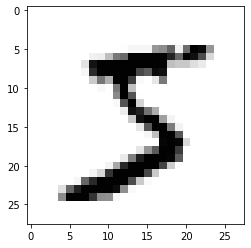

In [4]:
plt.imshow(X_train[0], cmap="Greys")
plt.show()

### Строка и столбец максимальной интенсивности

In [5]:
def convert_intensity(x):
    data = [[]]*len(x)
    for i in range(len(x)):
        data[i] = [np.argmax(np.mean(x[i], axis=0)), np.argmax(np.mean(x[i], axis=1)),
                  np.mean(np.argmax(x[i], axis=0)), np.mean(np.argmax(x[i], axis=1))]
    return pd.DataFrame(data)

In [6]:
data = convert_intensity(X_train)
data.head()

,0,1,2,3
0,13,7,8.214286,9.178571
1,20,8,6.321429,10.392857
2,18,15,9.500000,11.107143
3,11,20,6.500000,9.892857
4,15,15,5.535714,9.357143


### Опорные векторы по максимальной интенсивности

In [7]:
model = SVC().fit(data, y_train)

### Предсказание значений

In [8]:
data_test = convert_intensity(X_test)

In [9]:
result = np.round(model.predict(data_test)).astype(int)
print (result[0:50])
print (y_test[0:50])

[7 6 1 6 2 7 4 4 4 6 0 6 9 5 1 5 4 7 0 4 9 6 6 8 4 6 7 4 0 1 8 1 9 2 3 0 7
 1 2 1 1 7 9 2 1 8 1 2 9 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


### Оценка точности

In [10]:
print (classification_report(result, y_test, digits=4))

              precision    recall  f1-score   support

           0     0.7480    0.7442    0.7461       985
           1     0.6520    0.7590    0.7014       975
           2     0.5795    0.5992    0.5892       998
           3     0.5614    0.5395    0.5502      1051
           4     0.6792    0.5139    0.5851      1298
           5     0.2601    0.5395    0.3510       430
           6     0.6576    0.5764    0.6143      1093
           7     0.7928    0.5962    0.6806      1367
           8     0.4179    0.5107    0.4596       797
           9     0.5322    0.5338    0.5330      1006

    accuracy                         0.5926     10000
   macro avg     0.5881    0.5912    0.5810     10000
weighted avg     0.6205    0.5926    0.6000     10000

